# Predict the Age of a Trilobite Fossil


A Classification Dataset for Determining the Time Period of a Given Trilobite


Source: https://paleobiodb.org

Sorted to include only trilobites identified to the species level. It has been somewhat cleaned with pandas to narrow down the number of columns and rename some columns.

## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

#I want to use tensorFlow
# machine learning toolkit developed by Google
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
import ydf
print("TensorFlow Decision Forests v" + ydf.__version__)

# preprocessing tools
from sklearn.preprocessing import TargetEncoder, StandardScaler
# clustering for feature engineering
from sklearn.cluster import KMeans
# split data into a training set and a test set
from sklearn.model_selection import train_test_split

2025-08-23 17:10:03.909597: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755961803.928050  106163 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755961803.933275  106163 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755961803.947059  106163 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1755961803.947079  106163 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1755961803.947081  106163 computation_placer.cc:177] computation placer alr

TensorFlow version: 2.19.0
TensorFlow Decision Forests v0.13.0


## Analyse the dataset

In [2]:
data = pd.read_csv('trilobite.csv')

print("Full dataset shape is {}".format(data.shape))
data[:5]

Full dataset shape is (29039, 30)


,scientific_name,order,order_num,family,family_num,genus,genus_num,species,early_interval,late_interval,...,lithology,environment,assembly_composition,preservation_mode,collection_name,collection_type,life_habit,vision,diet,time_period
0,Australosutura llanoensis,Proetida,21062,Brachymetopidae,56732,Australosutura,21084,llanoensis,Ivorian,NaN,...,limestone,basinal (carbonate),macrofossils,body,"USNM 9047, Jack Sloan Ranch",taxonomic,low-level epifaunal,well-developed,deposit feeder,Carboniferous
1,Phillibole planucauda,Proetida,21062,Phillipsiidae,85866,Archegonus (Phillibole),21075,planucauda,Ivorian,NaN,...,limestone,basinal (carbonate),macrofossils,body,"USNM 9047, Jack Sloan Ranch",taxonomic,low-level epifaunal,well-developed,deposit feeder,Carboniferous
2,Thigriffides roundyi,Proetida,21062,Phillipsiidae,85866,Thigriffides,21387,roundyi,Ivorian,NaN,...,limestone,basinal (carbonate),macrofossils,body,"USNM 9047, Jack Sloan Ranch",taxonomic,low-level epifaunal,well-developed,deposit feeder,Carboniferous
3,Pudoproetus chappelensis,Proetida,21062,Proetidae,56726,Pudoproetus,177081,chappelensis,Ivorian,NaN,...,carbonate,marine indet.,NaN,body,USNM 9048,taxonomic,low-level epifaunal,well-developed,deposit feeder,Carboniferous
4,Pudoproetus chappelensis,Proetida,21062,Proetidae,56726,Pudoproetus,177081,chappelensis,Ivorian,NaN,...,carbonate,marine indet.,NaN,body,USNM 9044,taxonomic,low-level epifaunal,well-developed,deposit feeder,Carboniferous


### Features:
- __Scientific name__ - the genus and species of the trilobite
- __Order__ - The order of the given trilobite (order_num is the numerical form of it)
- __Family__ - The family of the given trilobite (family_num is the numerical form of it)
- __Genus__ - The genus of the given trilobite (genus_num is the numerical form of it)
- __Species__ - The species of the given trilobite
- __Early_interval and late_interval__ - the specific time period this fossil was located
- __max_age_mya and min_age_mya__ - the estimated age of the fossil, in millions of years
- __Country__ - the country in which the trilobite was found
- __State__ - the state in which the trilobite was found, if applicable
- __Longitude__, Latitude - the location of the fossil when it was found
- __Latlng_basis__ - how the latitude and longitude were idenfitied
- __Latlng_precision__ - how precise the longitude and latitude values are
- __Formation__ - the formation the trilobite was found (ex. the burgess shale)
- __Stratigraphy_scale__ - how comparatively large the relevant formation is
- __Lithology__ - the primary rock type at the formation
- __Environment__ - the type of environment represented back when the trilobite was alive
- __assembly_composition__ - what type of fossils were found together in the same location
- __preservation_mode__ - how the trilobite was fossilized
- __collection_name__ - a more specific description of where the fossil was located
- __collection_type__ - the type of information that can be gained from the collection as a while
- __life_habit__ - the lifestyle of the given trilobite
- __vision__ - how well the trilobite can see (relevant because genera like Cryptolithus are secondarily blind)
- __diet__ - what the trilobite ate when it was alive
- __time_period__ - the large time period during which the trilobite was alive (cambrian, ordovician, silurian, devonian, permian)

In [3]:
data.describe() 


,genus_num,max_age_mya,min_age_mya,longitude,latitude
count,29039.000000,29039.000000,29039.000000,29039.000000,29039.000000
mean,53150.403630,464.473163,457.732407,-19.125639,39.433712
std,92131.565306,47.651603,47.650266,81.913654,22.409790
min,19110.000000,254.140000,251.902000,-167.747253,-83.833336
25%,20077.000000,449.500000,445.200000,-93.266670,34.391666
50%,20980.000000,477.100000,471.300000,-6.850000,42.744446
75%,21574.000000,497.000000,491.500000,18.616667,51.290977
max,509317.000000,538.800000,521.000000,174.000000,83.050003


Check for null values:

In [4]:
print(data.isnull().sum())


scientific_name             0
order                       0
order_num                   0
family                      0
family_num                  0
genus                       0
genus_num                   0
species                     0
early_interval              0
late_interval           26483
max_age_mya                 0
min_age_mya                 0
country                    42
state                    6125
longitude                   0
latitude                    0
latlng_basis             3572
latlng_precision            0
formation                1912
stratigraphy_scale       5733
lithology                 102
environment               539
assembly_composition     3176
preservation_mode        2486
collection_name             0
collection_type            32
life_habit                  0
vision                   2227
diet                        0
time_period              2965
dtype: int64


13 columns have missing values. The most affected column is `late_interval` with ~91.2% missing values, while others like `state`, `stratigraphy_scale`, and `latlng_basis` also show notable missingness and may require imputation or careful handling during analysis.

In [5]:
data.select_dtypes(include=[np.number]).corr()

,genus_num,max_age_mya,min_age_mya,longitude,latitude
genus_num,1.000000,-0.018036,-0.012466,0.155084,-0.020598
max_age_mya,-0.018036,1.000000,0.994298,-0.070465,-0.062128
min_age_mya,-0.012466,0.994298,1.000000,-0.051637,-0.060854
longitude,0.155084,-0.070465,-0.051637,1.000000,-0.162694
latitude,-0.020598,-0.062128,-0.060854,-0.162694,1.000000


Define a new target, the average age of a fossil:

In [6]:
data['mean_age_mya'] = (data['min_age_mya'] + data['max_age_mya']) / 2

### Numerical Columns

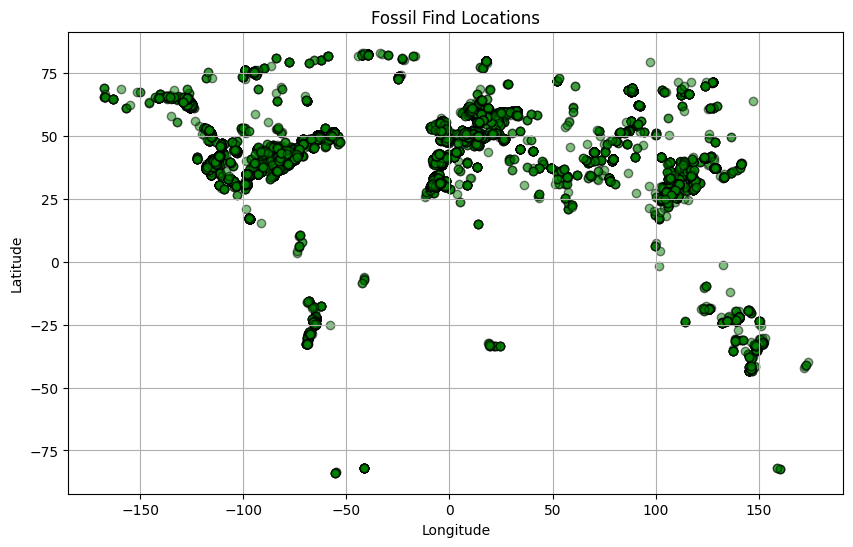

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(data['longitude'], data['latitude'], alpha=0.5, c='green', edgecolors='k')
plt.title('Fossil Find Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

Generate histograms for all the numerical columns

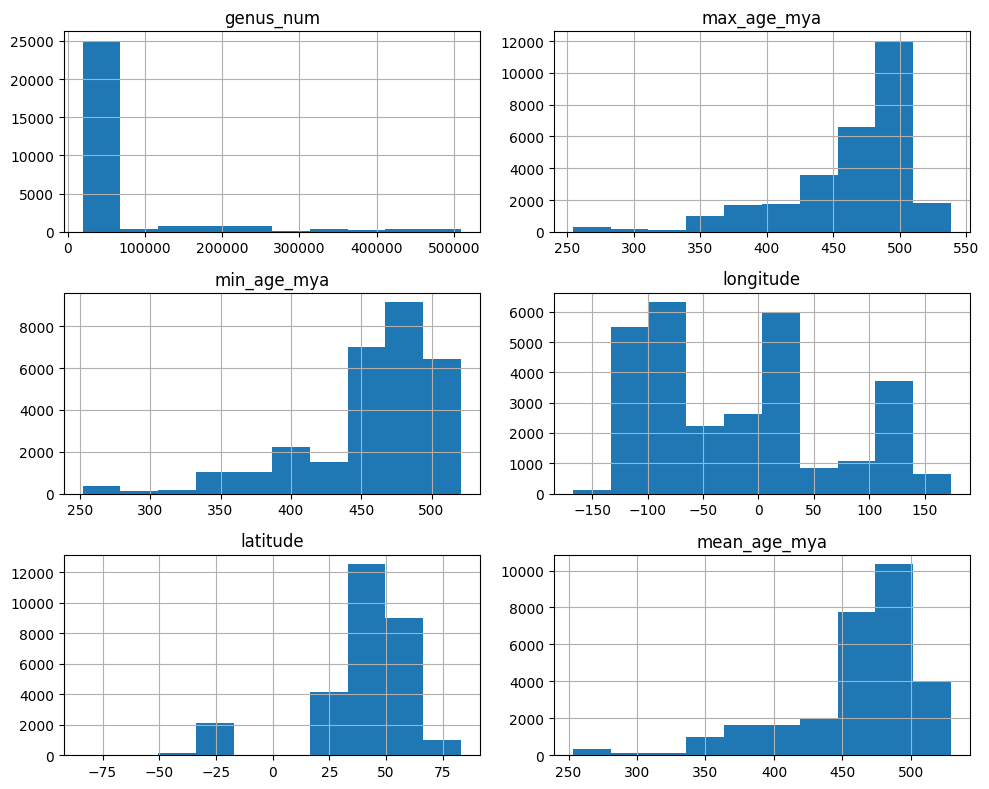

In [8]:
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

### Categorical columns

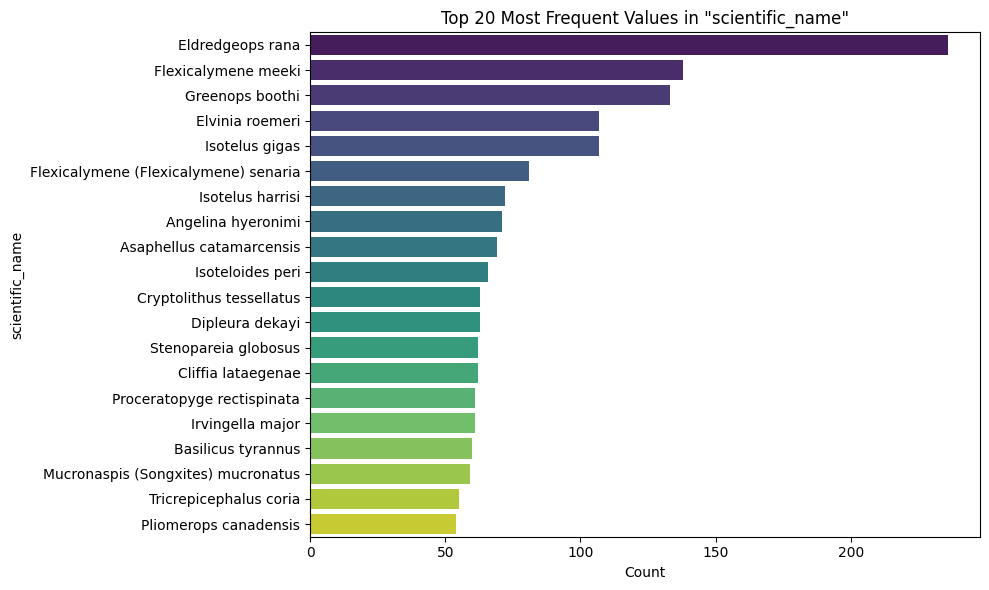

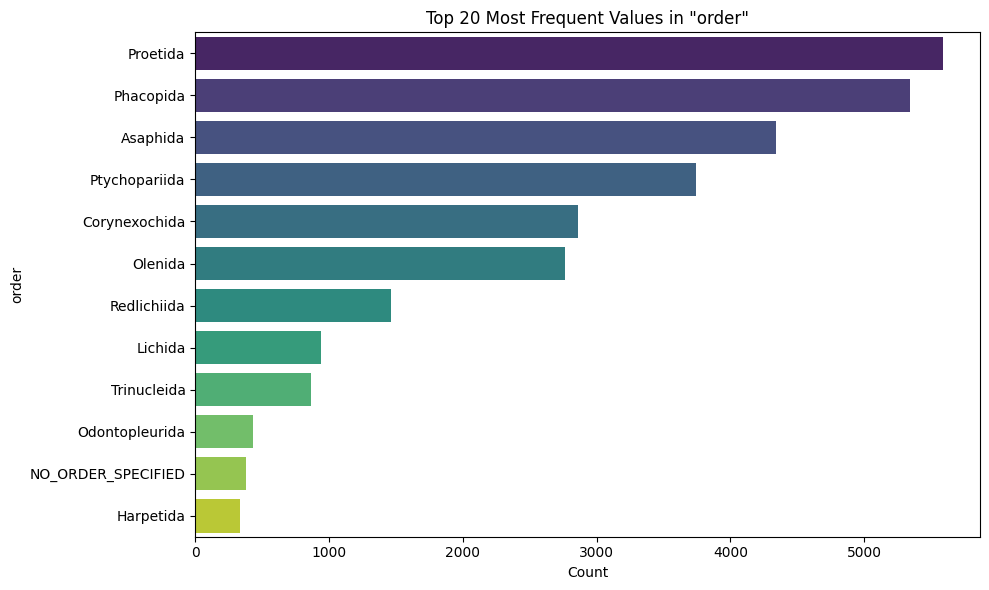

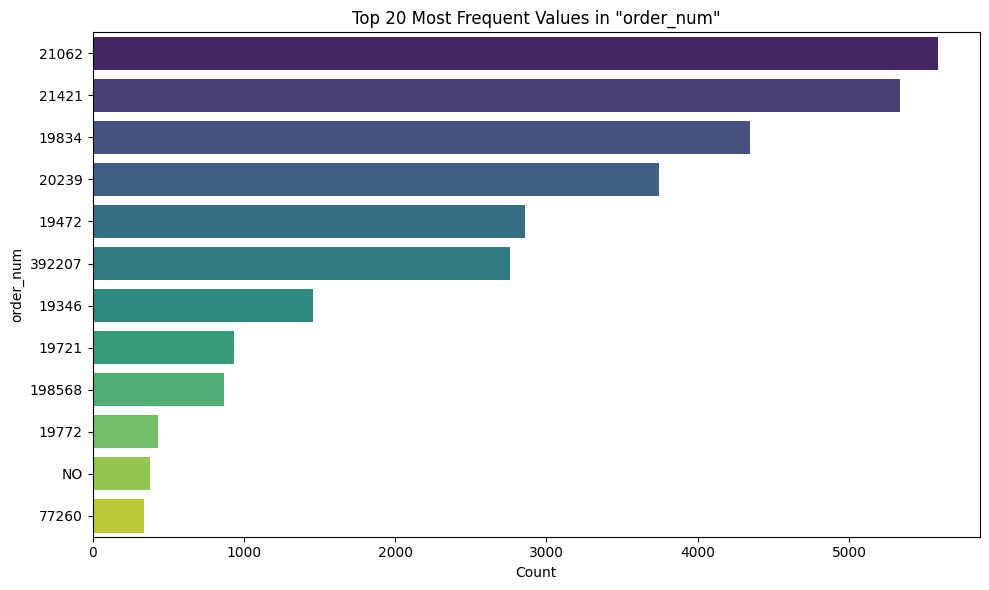

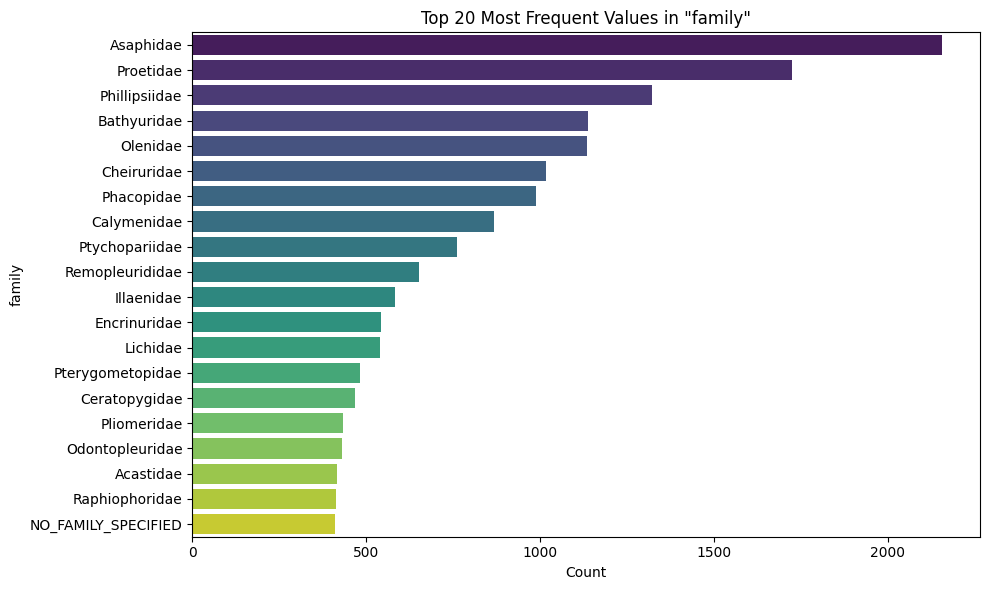

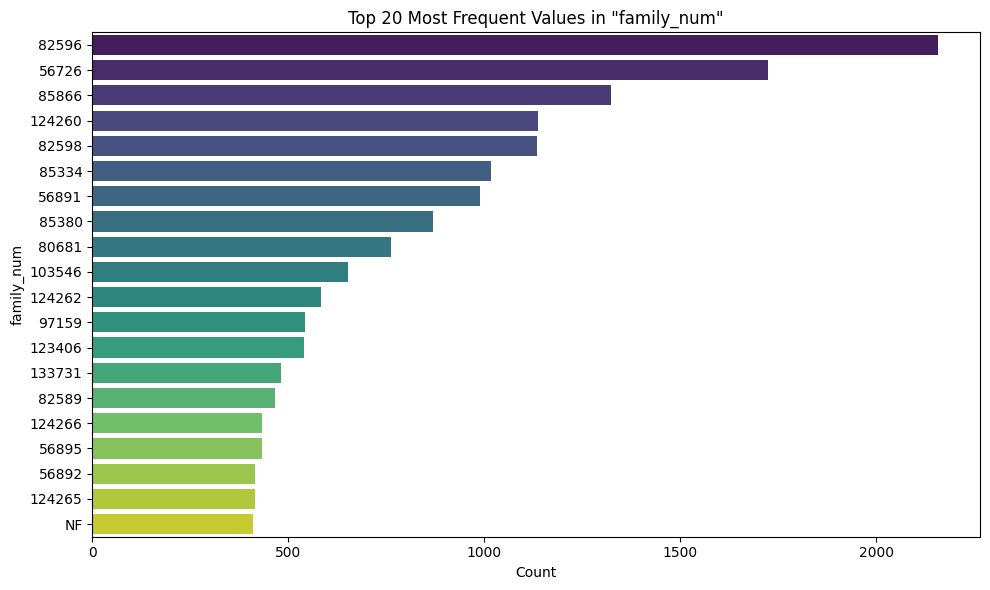

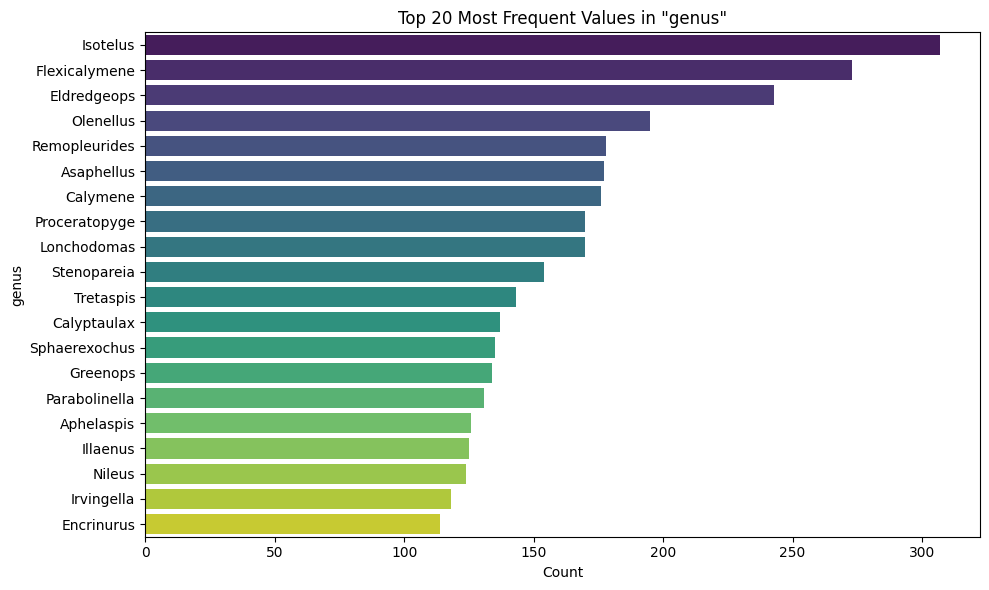

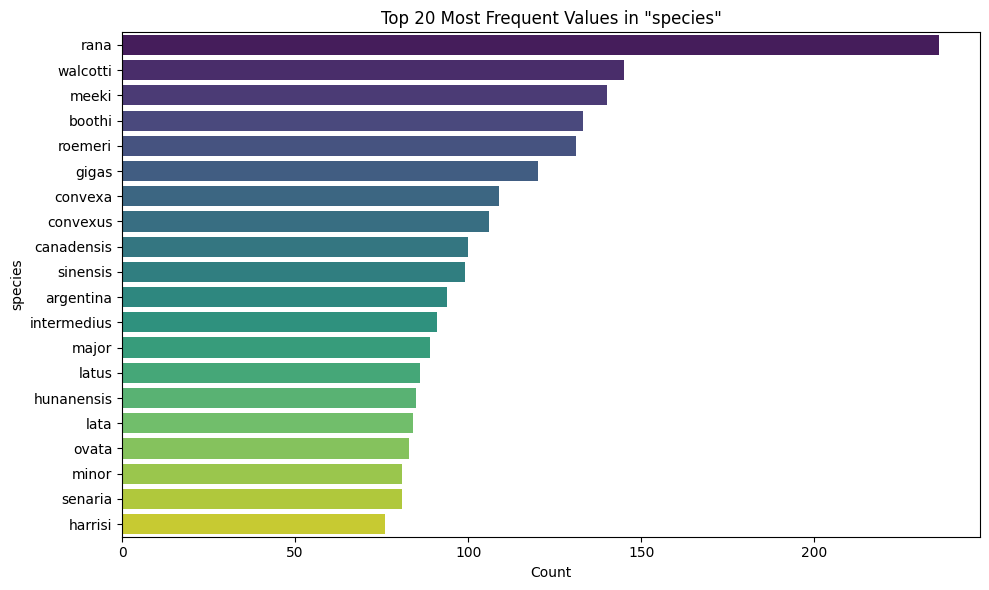

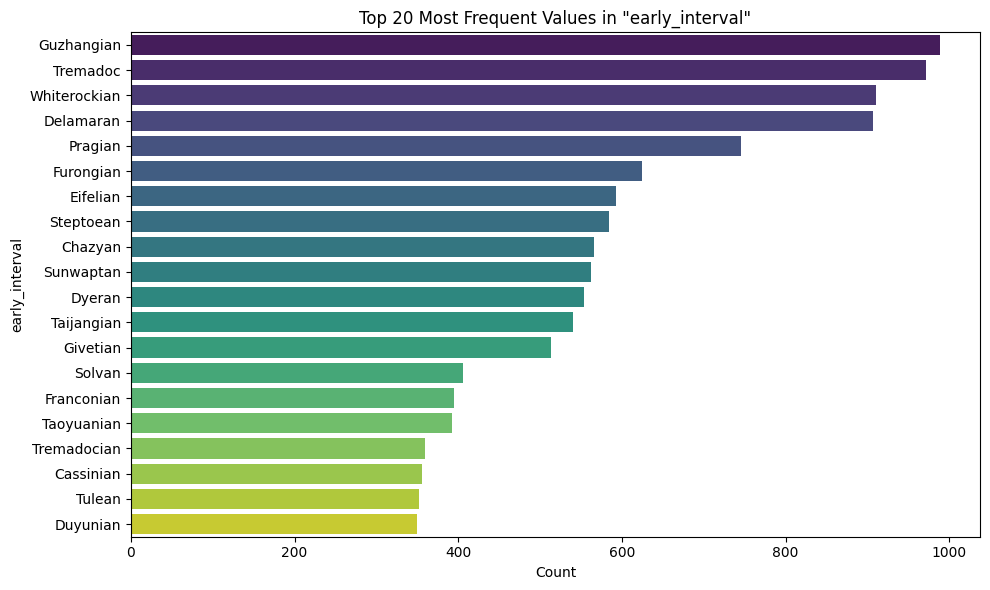

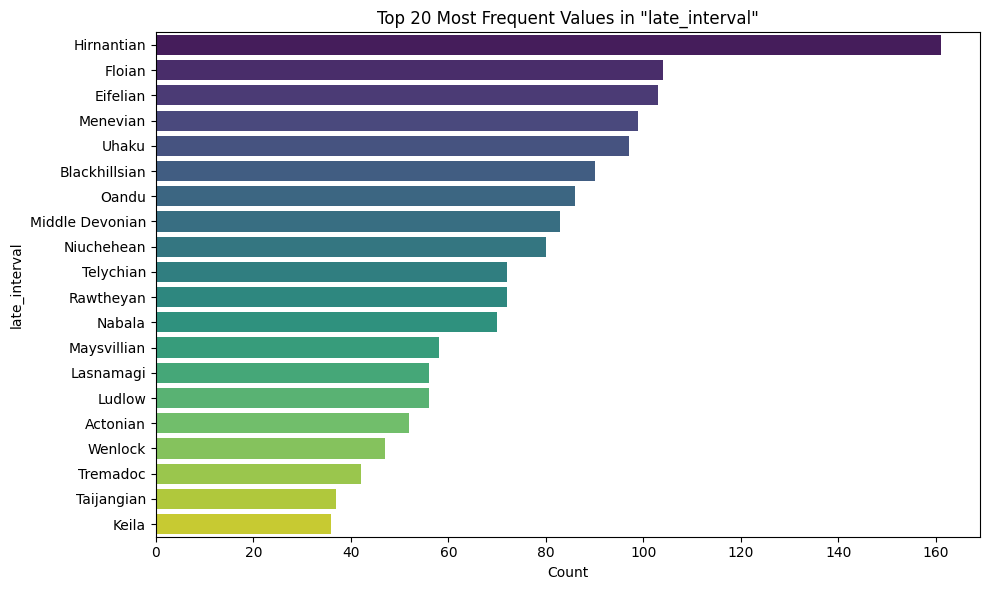

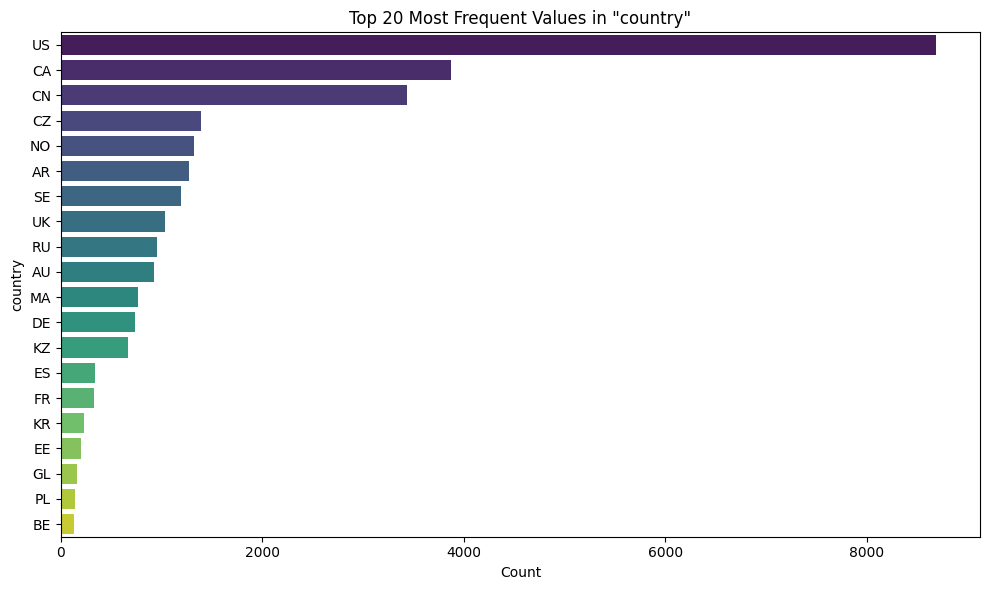

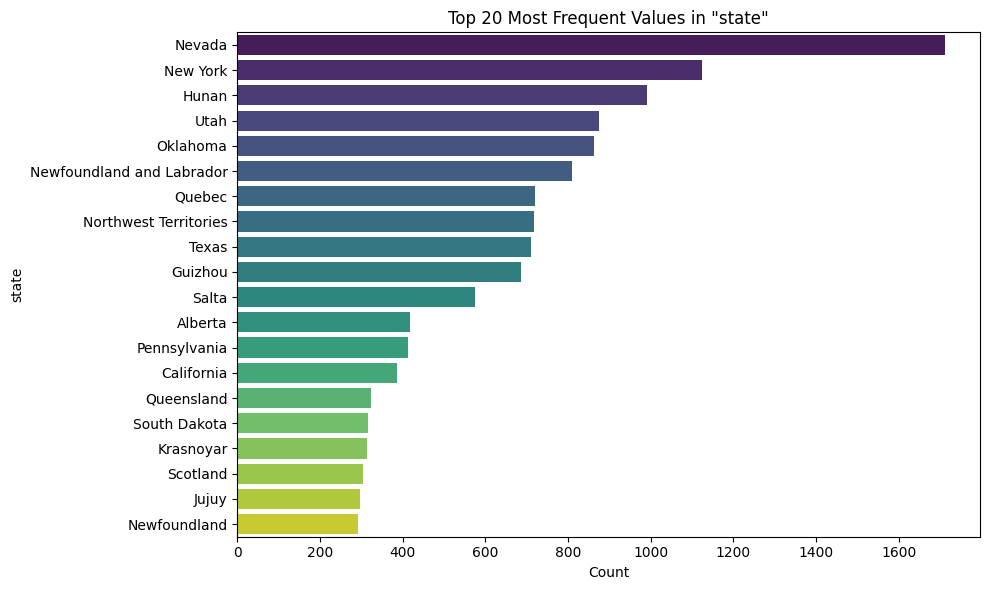

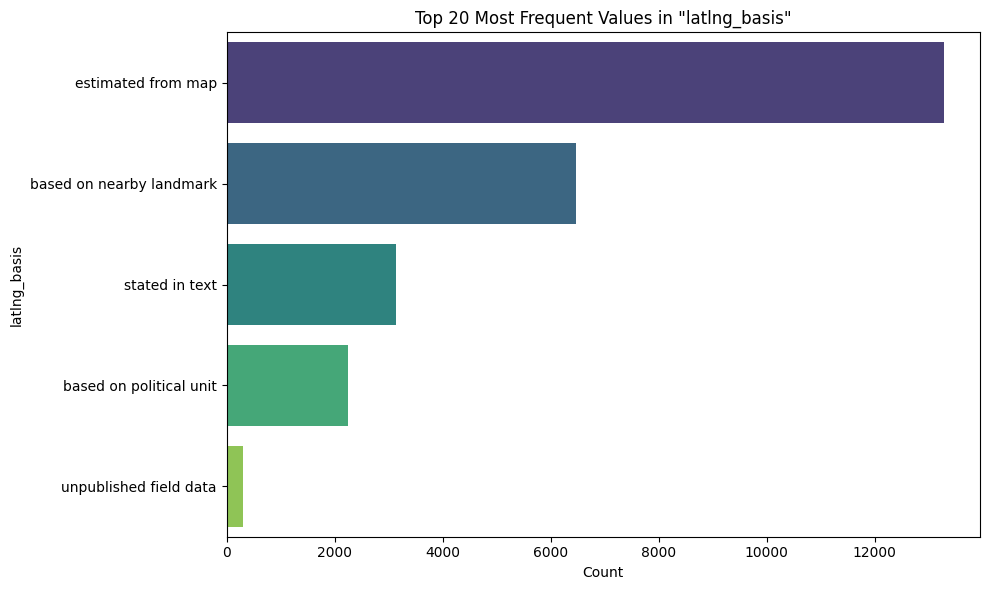

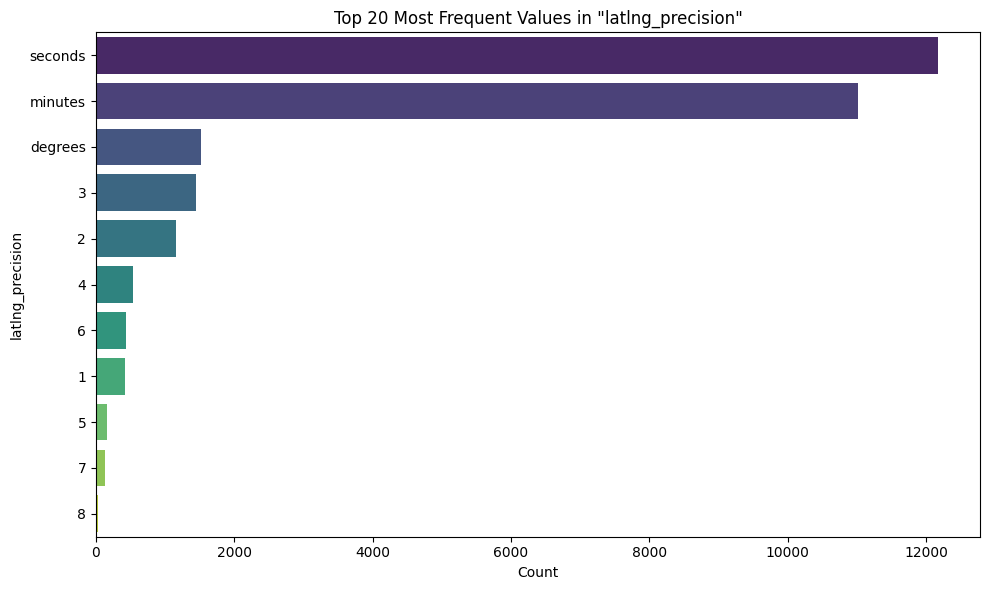

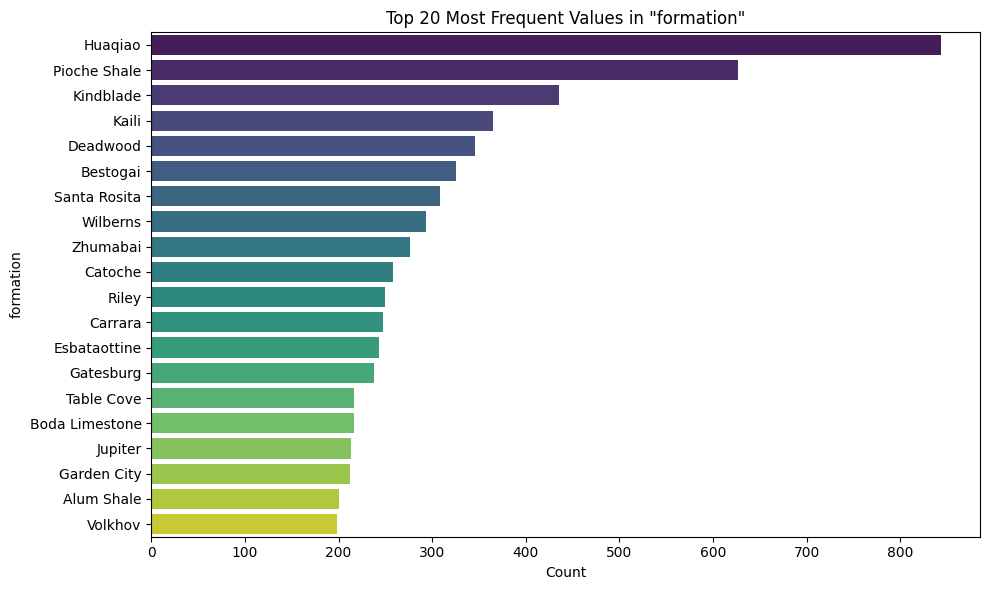

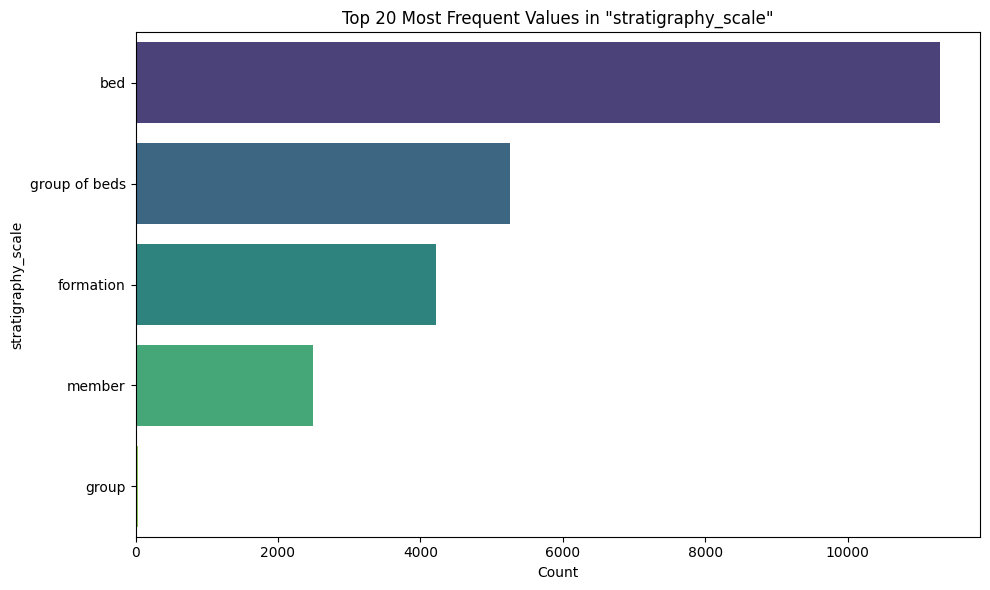

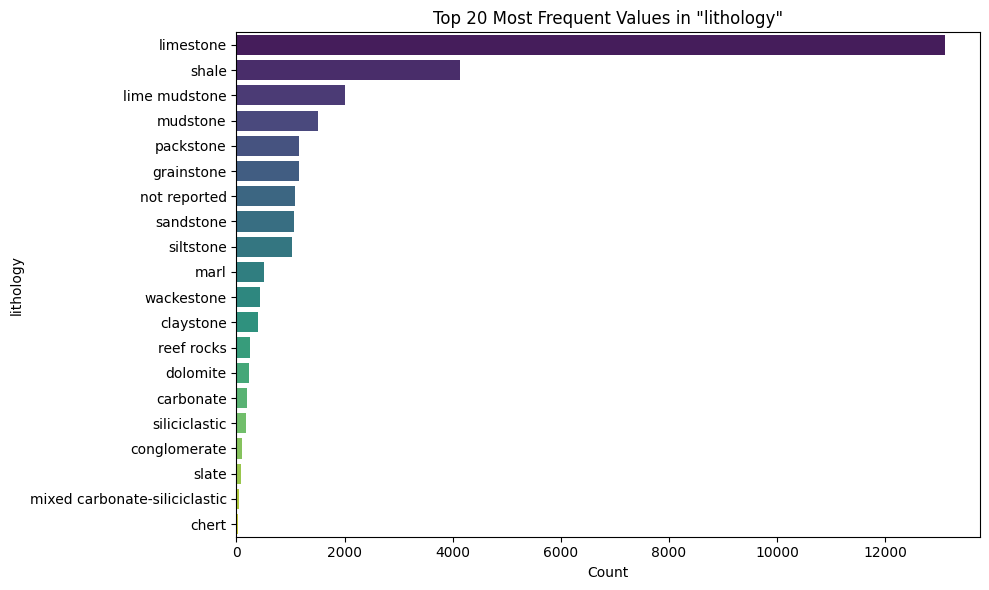

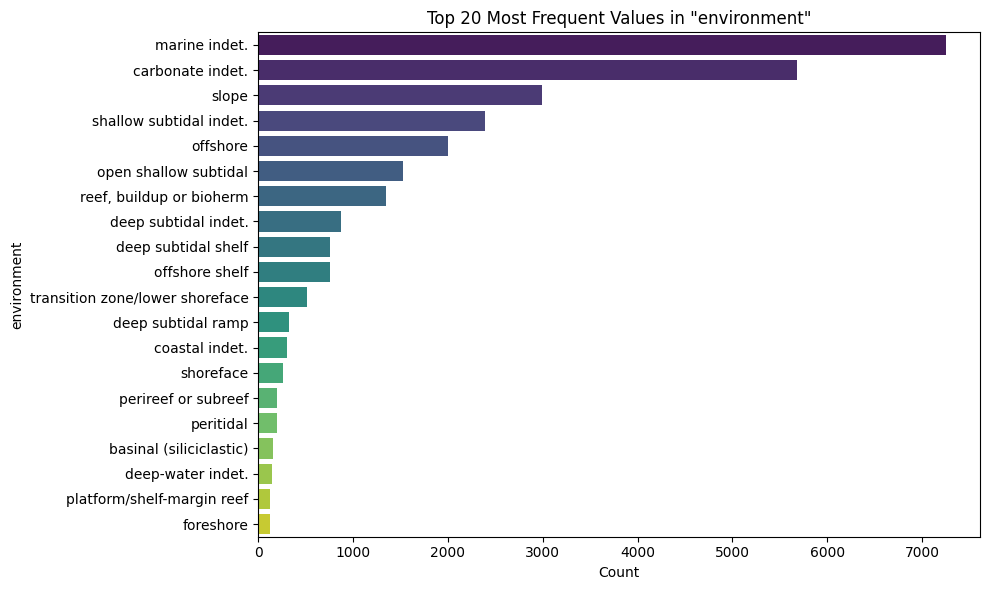

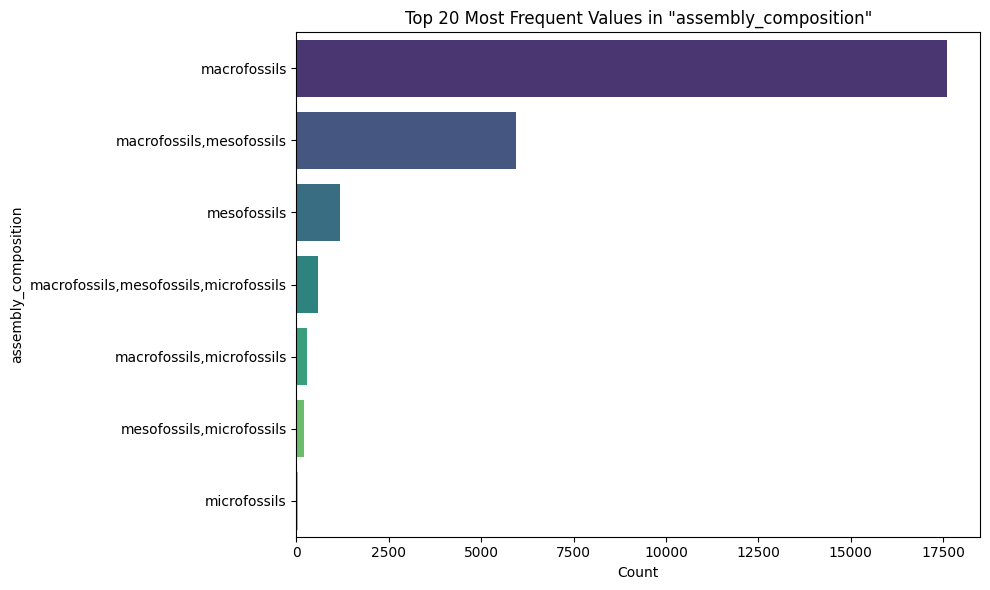

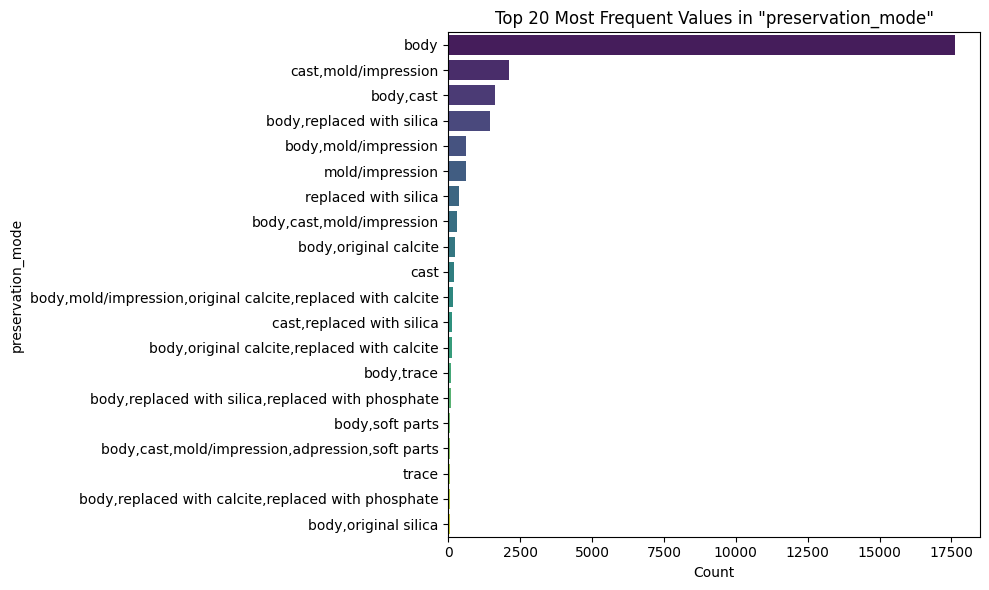

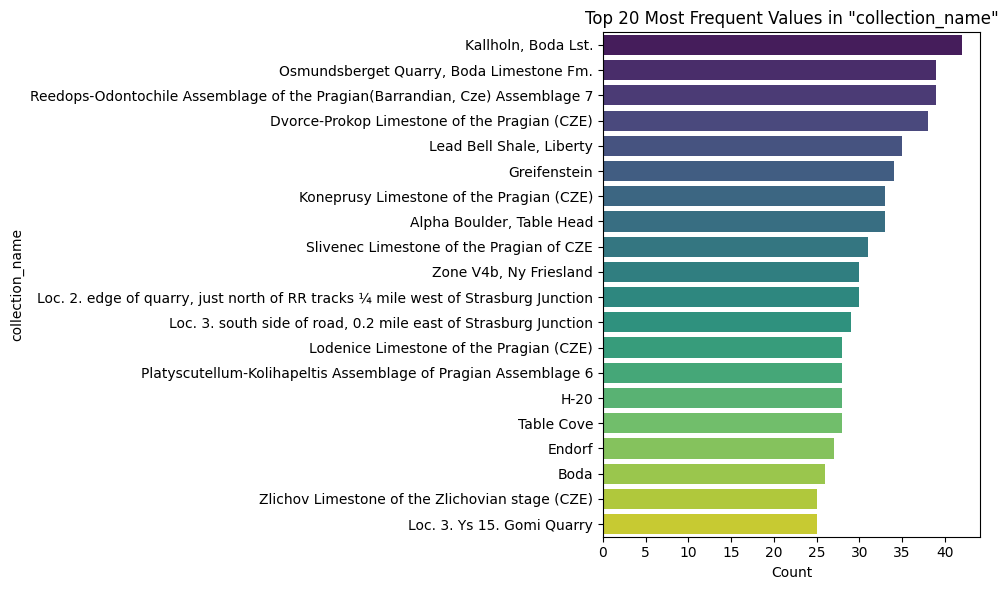

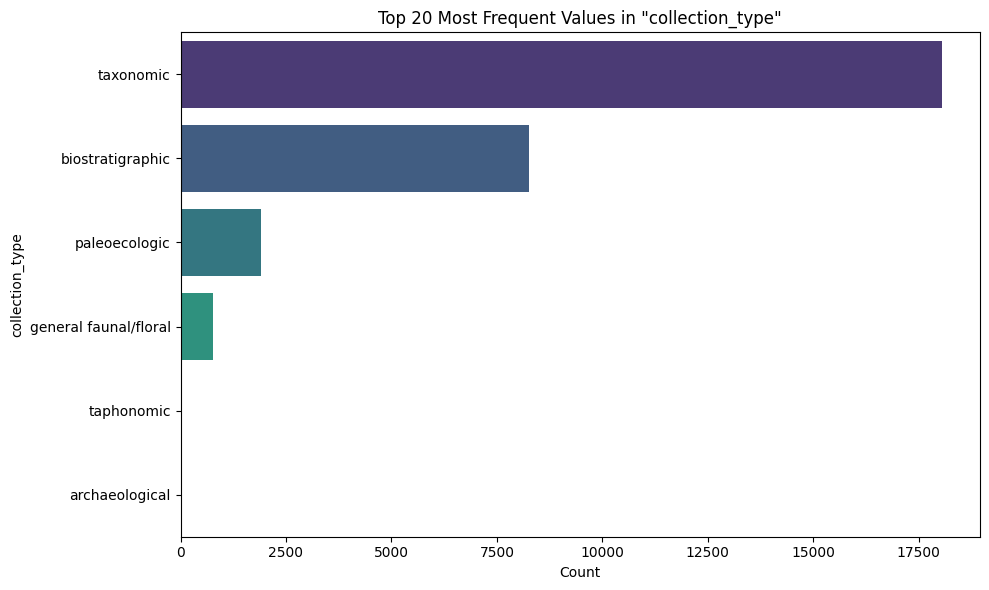

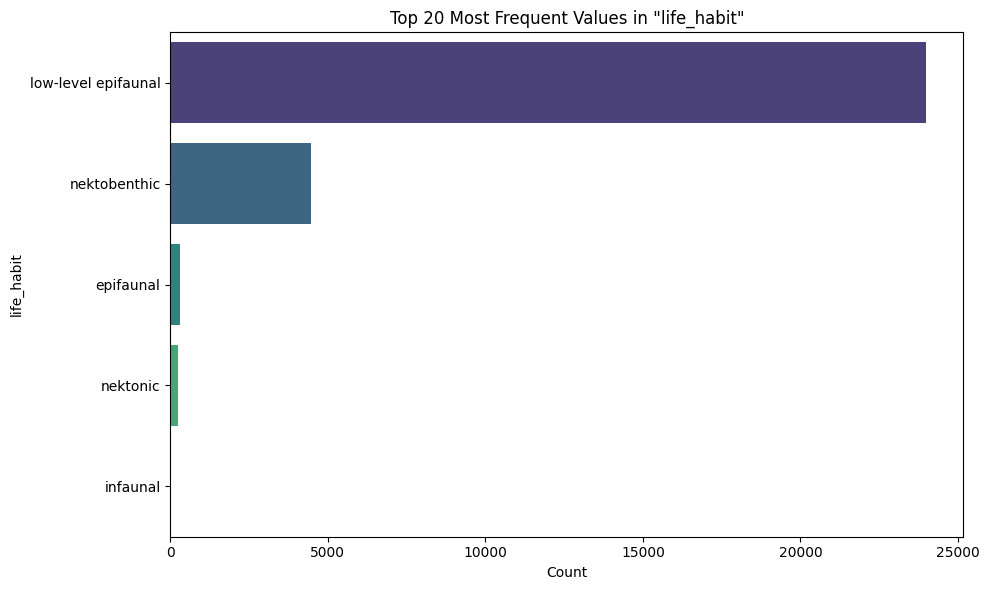

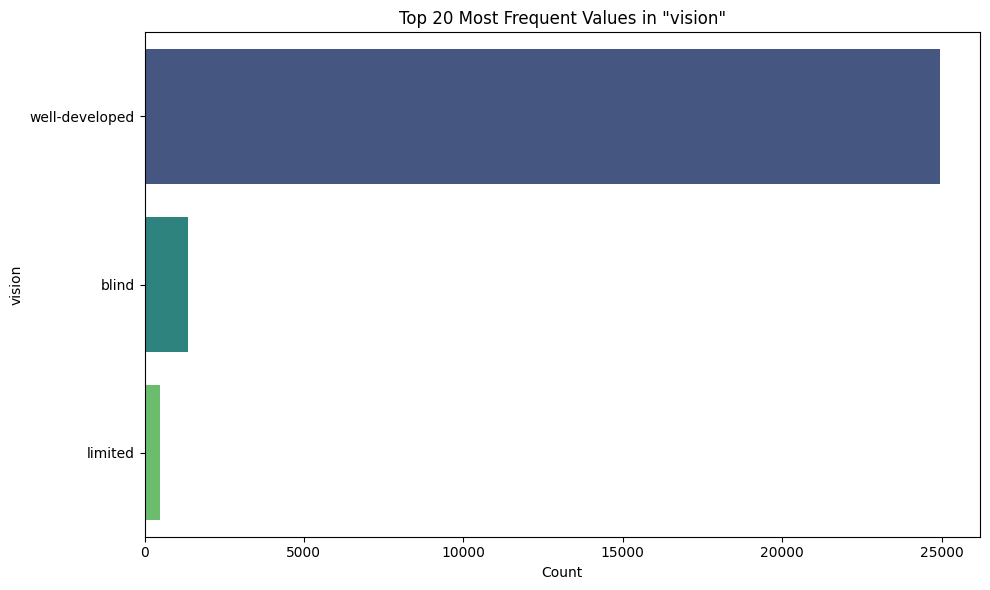

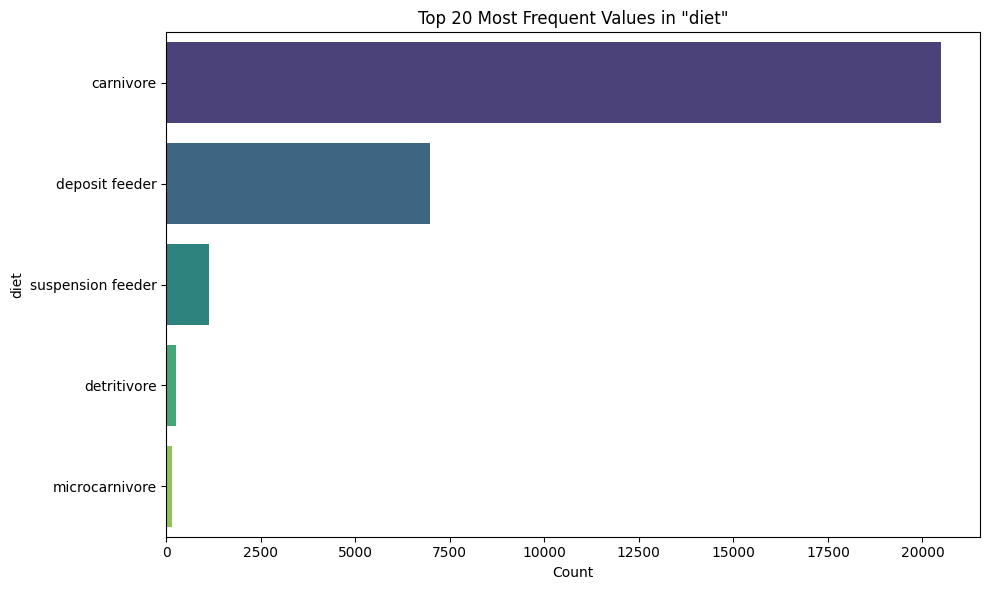

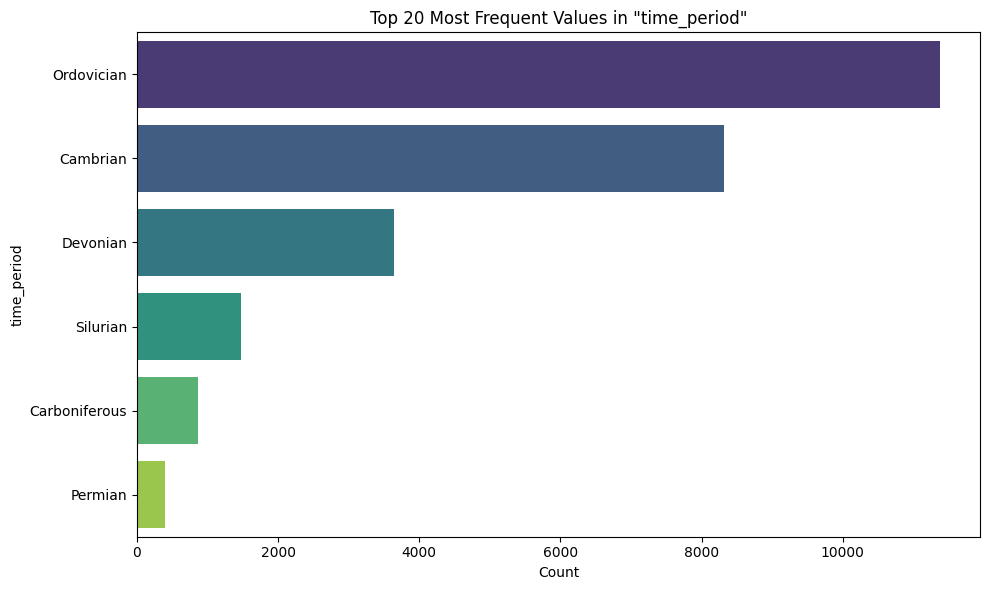

In [9]:
# Show top N categories for each categorical column
top_n = 20

for col in data.select_dtypes(include='object').columns:
    plt.figure(figsize=(10, 6))
    top_cats = data[col].value_counts().nlargest(top_n)
    sb.barplot(y=top_cats.index, x=top_cats.values, hue=top_cats.index, palette='viridis', legend=False)
    plt.title(f'Top {top_n} Most Frequent Values in "{col}"')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

## Feature Engineering

#### Target Encoding

Visualize unique value counts for columns with a reasonable number of unique values

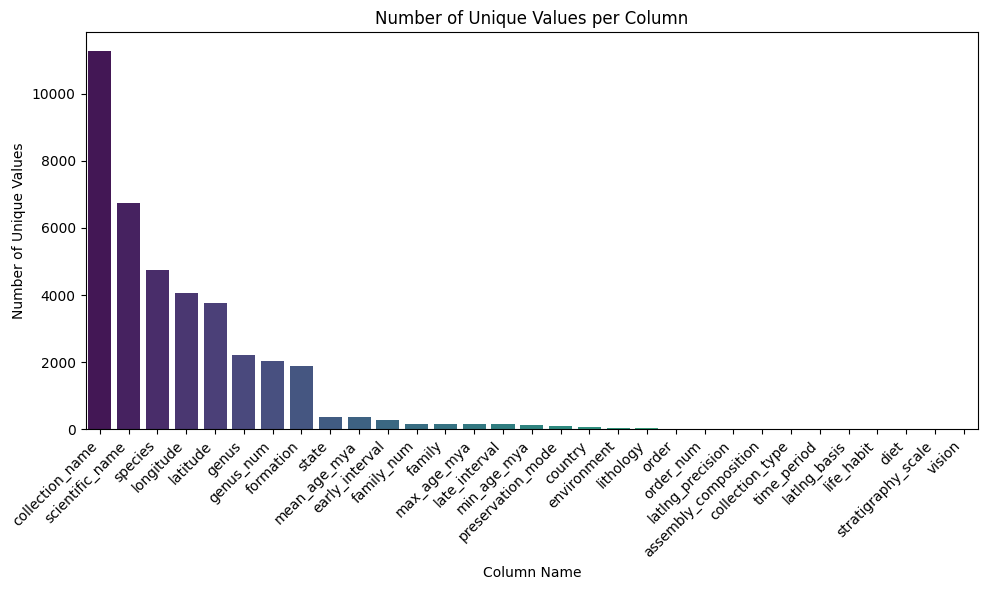

In [11]:
# (avoid plotting for columns with thousands of unique values which wouldn't be informative)
# reasonable_threshold = 50 # Adjust this threshold as needed
unique_counts = data.nunique().sort_values(ascending=False)
unique_counts_filtered = unique_counts

if not unique_counts_filtered.empty:
    plt.figure(figsize=(10, 6))
    sb.barplot(x=unique_counts_filtered.index, y=unique_counts_filtered.values, hue=unique_counts_filtered.index, palette='viridis')
    plt.title('Number of Unique Values per Column')
    plt.xlabel('Column Name')
    plt.ylabel('Number of Unique Values')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo columns found to visualize unique values for.")

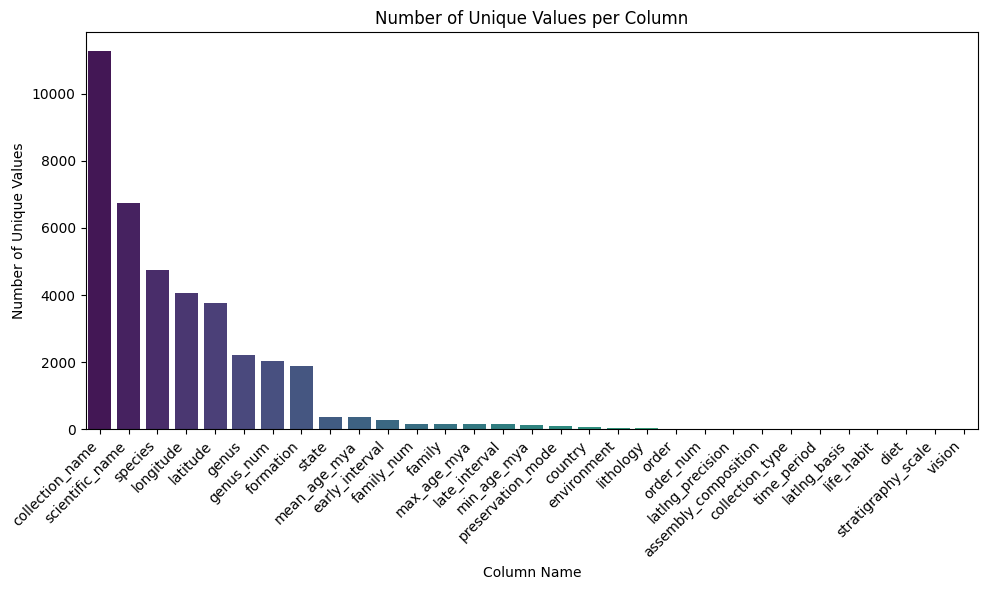

In [12]:
# (avoid plotting for columns with thousands of unique values which wouldn't be informative)
# reasonable_threshold = 50 # Adjust this threshold as needed
unique_counts = data.nunique().sort_values(ascending=False)
unique_counts_filtered = unique_counts

if not unique_counts_filtered.empty:
    plt.figure(figsize=(10, 6))
    sb.barplot(x=unique_counts_filtered.index, y=unique_counts_filtered.values, hue=unique_counts_filtered.index, legend=False, palette='viridis')
    plt.title('Number of Unique Values per Column')
    plt.xlabel('Column Name')
    plt.ylabel('Number of Unique Values')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo columns found to visualize unique values for.")

In [13]:
# Determine the threshold for high cardinality (e.g., 50 unique values)
cardinality_threshold = 50

# Identify high cardinality columns
high_card_cols = [col for col in data.columns if data[col].nunique() > cardinality_threshold]

print("High Cardinality Columns:")
high_card_cols

High Cardinality Columns:


['scientific_name',
 'family',
 'family_num',
 'genus',
 'genus_num',
 'species',
 'early_interval',
 'late_interval',
 'max_age_mya',
 'min_age_mya',
 'country',
 'state',
 'longitude',
 'latitude',
 'formation',
 'preservation_mode',
 'collection_name',
 'mean_age_mya']

In [14]:
# I make a copy of the data to avoid overwriting
data_encoded = data.copy()

target_encoder = TargetEncoder()
data_encoded[high_card_cols] = target_encoder.fit_transform(data_encoded[high_card_cols], data_encoded["mean_age_mya"])
data_encoded[high_card_cols].head()

,scientific_name,family,family_num,genus,genus_num,species,early_interval,late_interval,max_age_mya,min_age_mya,country,state,longitude,latitude,formation,preservation_mode,collection_name,mean_age_mya
0,461.313509,346.517375,346.517375,343.746621,343.746621,489.982040,350.075414,462.155257,350.075414,350.712458,469.252519,454.186816,350.200000,350.200000,351.939709,456.991521,350.200000,350.2
1,349.789143,325.302416,325.302416,350.075274,346.889959,349.789143,350.056127,461.950680,350.056127,350.783538,469.037534,451.074907,350.200000,350.200000,351.805664,456.974056,350.200000,350.2
2,351.810995,325.326915,325.326915,351.093046,351.093046,351.810995,349.985885,461.745092,349.985885,350.778029,468.664345,450.625488,350.200000,350.200000,351.195347,456.587214,350.200000,350.2
3,350.541415,400.818813,400.818813,354.581343,354.581343,350.541415,350.000309,462.025140,350.000309,350.766794,469.096690,448.966466,350.783252,463.149583,351.615223,457.106965,461.157382,350.2
4,350.540938,400.429520,400.429520,353.019821,353.019821,350.540938,350.056127,461.950680,350.056127,350.783538,469.037534,451.074907,350.729321,458.012778,351.805664,456.974056,461.075825,350.2


### Impute missing numerical values with the mean


In [ ]:
for col in data_encoded.select_dtypes(include=np.number).columns:
    if data_encoded[col].isnull().any():
        mean_val = data_encoded[col].mean()
        data_encoded[col].fillna(mean_val, inplace=True)

# Impute missing categorical values with the mode
for col in data_encoded.select_dtypes(include='object').columns:
    if data_encoded[col].isnull().any():
        mode_val = data_encoded[col].mode()[0] # .mode() returns a Series, take the first element
        data_encoded[col].fillna(mode_val, inplace=True)

print("Missing values after imputation:")
print(data_encoded.isnull().sum())

Missing values after imputation:
scientific_name         0
order                   0
order_num               0
family                  0
family_num              0
genus                   0
genus_num               0
species                 0
early_interval          0
late_interval           0
max_age_mya             0
min_age_mya             0
country                 0
state                   0
longitude               0
latitude                0
latlng_basis            0
latlng_precision        0
formation               0
stratigraphy_scale      0
lithology               0
environment             0
assembly_composition    0
preservation_mode       0
collection_name         0
collection_type         0
life_habit              0
vision                  0
diet                    0
time_period             0
mean_age_mya            0
dtype: int64


/tmp/ipykernel_106163/1380948892.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_encoded[col].fillna(mode_val, inplace=True)


### Scaling

In [16]:
numerical_cols = data_encoded.select_dtypes(include=np.number).columns.tolist()

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to the numerical columns
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

print("DataFrame after standardization:")
display(data_encoded.head())

DataFrame after standardization:


,scientific_name,order,order_num,family,family_num,genus,genus_num,species,early_interval,late_interval,...,environment,assembly_composition,preservation_mode,collection_name,collection_type,life_habit,vision,diet,time_period,mean_age_mya
0,-0.018642,Proetida,21062,-2.555378,-2.554799,-2.521616,-2.517026,0.690769,-2.339491,0.090319,...,basinal (carbonate),macrofossils,-0.241711,-2.924768,taxonomic,low-level epifaunal,well-developed,deposit feeder,Carboniferous,-2.339844
1,-2.624189,Proetida,21062,-3.028525,-3.027838,-2.385520,-2.449506,-2.856486,-2.339898,0.072227,...,basinal (carbonate),macrofossils,-0.242736,-2.924768,taxonomic,low-level epifaunal,well-developed,deposit feeder,Carboniferous,-2.339844
2,-2.576952,Proetida,21062,-3.027979,-3.027292,-2.363633,-2.359222,-2.805328,-2.341377,0.054046,...,basinal (carbonate),macrofossils,-0.265445,-2.924768,taxonomic,low-level epifaunal,well-developed,deposit feeder,Carboniferous,-2.339844
3,-2.606613,Proetida,21062,-1.344318,-1.344016,-2.288619,-2.284292,-2.837451,-2.341073,0.078812,...,marine indet.,macrofossils,-0.234934,-0.068415,taxonomic,low-level epifaunal,well-developed,deposit feeder,Carboniferous,-2.339844
4,-2.606625,Proetida,21062,-1.353000,-1.352696,-2.322199,-2.317834,-2.837463,-2.339898,0.072227,...,marine indet.,macrofossils,-0.242736,-0.070514,taxonomic,low-level epifaunal,well-developed,deposit feeder,Carboniferous,-2.339844


Test: do clustering

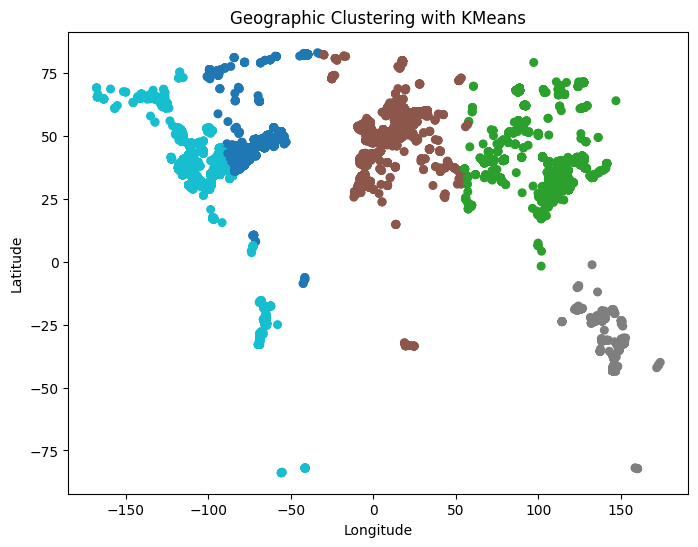

In [19]:
X = data[["longitude", "latitude"]]

# # Scaling the features
# X_scaled = scaler.fit_transform(X)

# Clustering with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
data["Cluster"] = kmeans.fit_predict(X)

# Visualizing the clusters
plt.figure(figsize=(8,6))
plt.scatter(data["longitude"], data["latitude"], c=data["Cluster"], cmap="tab10", s=30)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Clustering with KMeans")
plt.show()

In [21]:
# Drop original age columns and the target variable from features
X = data_encoded.drop(columns=['min_age_mya', 'max_age_mya', 'mean_age_mya'])

In [22]:
# Define target variable
y = data_encoded['mean_age_mya']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (23231, 28)
Test set shape: (5808, 28)


## Build the model, train and predict

In [25]:
# Train a Random Forest model directly
model = ydf.RandomForestLearner(
    label="target",
    task=ydf.Task.REGRESSION,  # Since we're predicting continuous age values
    num_trees=100,
    max_depth=10,
    min_examples=5
).train(pd.concat([X_train, y_train.rename("target")], axis=1))

print("Model training completed!")

[Warning] Column 'order_num' is detected as CATEGORICAL but its values look like numbers (e.g., b'19472, 20239, 19772'). Should the column not be NUMERICAL instead? If so, feed numerical values instead of strings or objects.


Train model on 23231 examples
Model trained in 0:00:00.968554
Model training completed!


In [26]:
# Evaluate the model on test data
test_data = pd.concat([X_test, y_test.rename("target")], axis=1)
evaluation = model.evaluate(test_data)
print(evaluation)

RMSE: 0.0748587
num examples: 5808
num examples (weighted): 5808



In [27]:
# Make predictions
predictions = model.predict(X_test)

# Calculate additional metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Root Mean Square Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")  
print(f"R² Score: {r2:.4f}")

Root Mean Square Error: 0.07
Mean Absolute Error: 0.01
R² Score: 0.9944


## Visualize the results


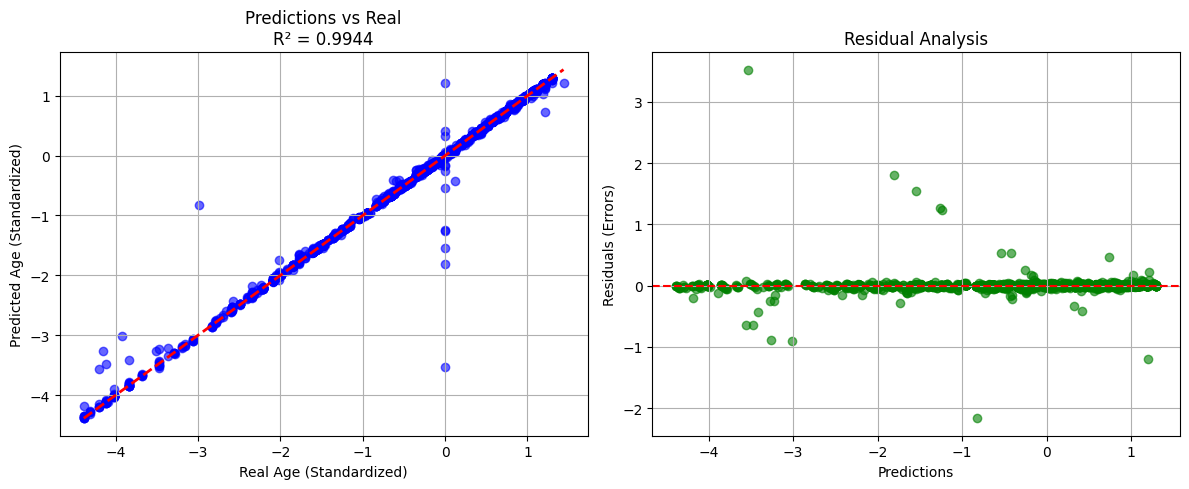

In [29]:
plt.figure(figsize=(12, 5))

# Plot 1: Scatter plot predictions vs real
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Real Age (Standardized)')
plt.ylabel('Predicted Age (Standardized)')
plt.title(f'Predictions vs Real\nR² = {r2:.4f}')
plt.grid(True)

# Plot 2: Residuals (errors)
plt.subplot(1, 2, 2)
residuals = y_test - predictions
plt.scatter(predictions, residuals, alpha=0.6, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predictions')
plt.ylabel('Residuals (Errors)')
plt.title('Residual Analysis')
plt.grid(True)

plt.tight_layout()
plt.show()
